# MA0218: Introduction to Data Science and Artificial Intelligence

## Problem: Which factors affect the severity of the damage of a building after an earthquake?

Team Name: Data Newbies

Lecturer: Lim Zhi Jun



Team Members and Contribution:

Lee Yi Feng : Data Cleaning and Preparation

Notaria Manav Baiju : Decision Tree

Dihan Jannatan Mutaalim : KNN

Riasa Fadhilla Martono : Random Forest


Tutorial Group: MA10

Basic Libraries:

In [109]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning and Preparation

### Response Variable Data Insight

In [110]:
bdg_labels = pd.read_csv('train_labels.csv')
bdg_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [111]:
bdg_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [112]:
damage_grade = bdg_labels["damage_grade"]
damage_grade

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

### Predictors Variable Data Insight

In [113]:
bdg_data = pd.read_csv('train_values.csv')
bdg_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [114]:
bdg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### Predictors variables to choose

In [115]:
bdgPredData = pd.DataFrame(bdg_data[['age', 'foundation_type', 'count_floors_pre_eq', 'height_percentage','roof_type','ground_floor_type', 'land_surface_condition']])

In [116]:
bdgPredData.head()

,age,foundation_type,count_floors_pre_eq,height_percentage,roof_type,ground_floor_type,land_surface_condition
0,30,r,2,5,n,f,t
1,10,r,2,7,n,x,o
2,10,r,2,5,n,f,t
3,10,r,2,5,n,f,t
4,30,r,3,9,n,f,t


### Joining Response data with Predictors data

In [117]:
data_use = pd.concat([damage_grade, bdgPredData], axis = 1).reindex(damage_grade.index)
data_use.head()

,damage_grade,age,foundation_type,count_floors_pre_eq,height_percentage,roof_type,ground_floor_type,land_surface_condition
0,3,30,r,2,5,n,f,t
1,2,10,r,2,7,n,x,o
2,3,10,r,2,5,n,f,t
3,2,10,r,2,5,n,f,t
4,3,30,r,3,9,n,f,t


### Value Insight

In [118]:
print("age:",data_use['age'].unique()) #final products after cleaning
print('foundation_type:',data_use['foundation_type'].unique())
print('count_floors_pre_eq:',data_use['count_floors_pre_eq'].unique())
print('height_percentage:', data_use['height_percentage'].unique())
print('roof_type:',data_use['roof_type'].unique())
print('ground_floor_type:',data_use['ground_floor_type'].unique())
print('land_surface_condition:',data_use['land_surface_condition'].unique())
print('damage_grade:',data_use['damage_grade'].unique())


age: [ 30  10  25   0  15  20  45  55   5  40  80  60  35  70  50  65 100  75
  85 190 995 105  90 120  95 110 115 150 200 130 125 140 155 160 175 135
 145 195 180 165 170 185]
foundation_type: ['r' 'w' 'i' 'u' 'h']
count_floors_pre_eq: [2 3 1 4 5 6 7 8 9]
height_percentage: [ 5  7  9  4  6  3 10  8  2 32 12 11 13 16 15 18 26 17 19 14 20 23 21 25
 24 28 31]
roof_type: ['n' 'q' 'x']
ground_floor_type: ['f' 'x' 'v' 'z' 'm']
land_surface_condition: ['t' 'o' 'n']
damage_grade: [3 2 1]


###  Removing missing value and unreasonable value

In [119]:
data_clean = data_use.dropna()
data_clean = data_clean[data_clean['age'] != 995]

### Value Count Visualisation

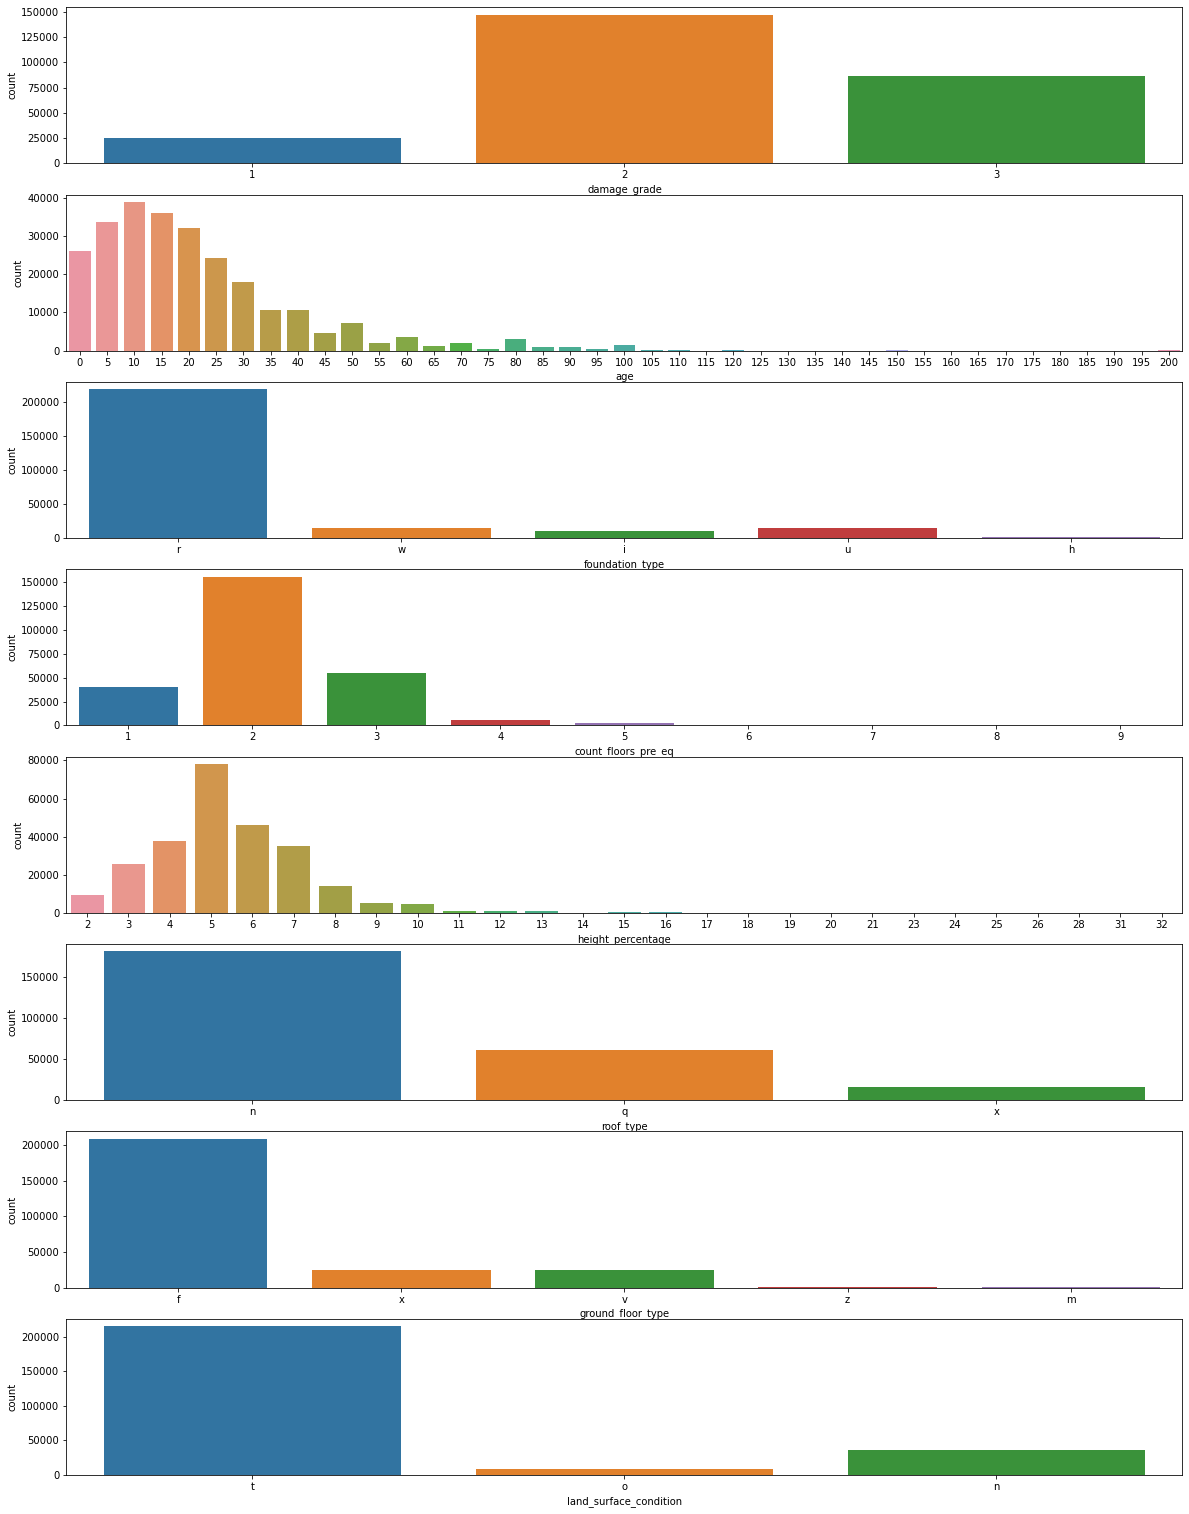

In [120]:
f, axes = plt.subplots(8, 1, figsize=(20, 27))

count = 0
for variable in data_clean:
    sb.countplot(data_clean[variable],ax=axes[count])
    count+=1

### Grouping of sub-variables into groups for easier visualization 

#### We found out that the foundation type is more skewed towards 'r', then we grouped the rest into 'not r'

In [121]:
foundation_type_others = ['w', 'i', 'u','h']

data_final = data_clean.replace(foundation_type_others,'not r')

### Visualising Final Data

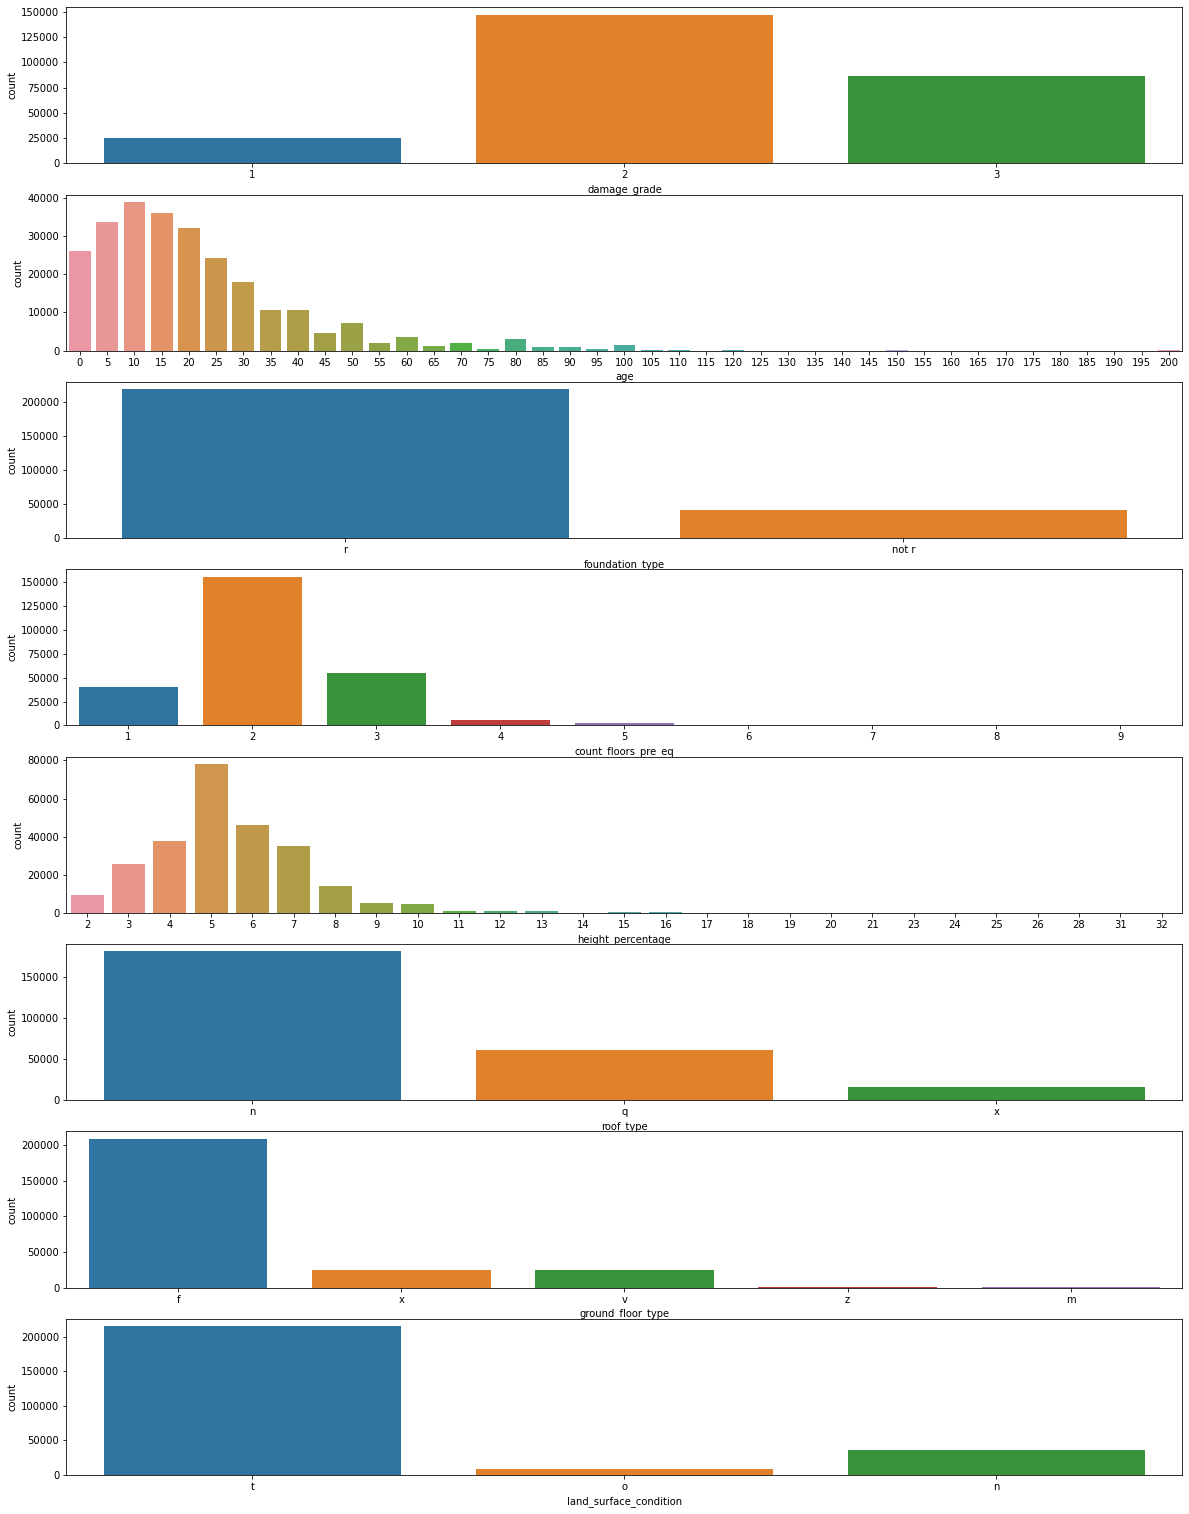

In [122]:
f, axes = plt.subplots(8, 1, figsize=(20, 27))

count = 0
for variable in data_final:
    sb.countplot(data_final[variable],ax=axes[count])
    count+=1

### Numeric Data Present

In [123]:
data_numeric = data_final.select_dtypes(include = ['int64']) 
data_numeric.head()

,damage_grade,age,count_floors_pre_eq,height_percentage
0,3,30,2,5
1,2,10,2,7
2,3,10,2,5
3,2,10,2,5
4,3,30,3,9


In [124]:
data_numeric.describe()

,damage_grade,age,count_floors_pre_eq,height_percentage
count,259211.00000,259211.000000,259211.000000,259211.000000
mean,2.23874,21.341706,2.129308,5.433373
std,0.61173,19.606818,0.727307,1.917928
min,1.00000,0.000000,1.000000,2.000000
25%,2.00000,10.000000,2.000000,4.000000
50%,2.00000,15.000000,2.000000,5.000000
75%,3.00000,30.000000,2.000000,6.000000
max,3.00000,200.000000,9.000000,32.000000


### Categorical Data Present

In [125]:
data_object=data_final.select_dtypes(include = ['object'])
data_object.head()

,foundation_type,roof_type,ground_floor_type,land_surface_condition
0,r,n,f,t
1,r,n,x,o
2,r,n,f,t
3,r,n,f,t
4,r,n,f,t


In [126]:
data_object.describe()

,foundation_type,roof_type,ground_floor_type,land_surface_condition
count,259211,259211,259211,259211
unique,2,3,5,3
top,r,n,f,t
freq,217932,181762,208421,215522


### Encoding Categorical Variables into Numerical Variables

In [127]:
data_final['foundation_type_fact'],_ = pd.factorize(data_final['foundation_type'])
data_final['roof_type_fact'],_ = pd.factorize(data_final['roof_type'])
data_final['ground_floor_type_fact'],_ = pd.factorize(data_final['ground_floor_type'])
data_final['land_surface_condition_fact'],_ = pd.factorize(data_final['land_surface_condition'])

### Mapping type to respective categories

In [128]:
#mapping type to the respective categories

print('foundation_type')
print(data_final['foundation_type'].unique())
print(data_final['foundation_type_fact'].unique(), '\n')

print('roof_type')
print(data_final['roof_type'].unique())
print(data_final['roof_type_fact'].unique(), '\n')

print('ground_floor_type')
print(data_final['ground_floor_type'].unique())
print(data_final['ground_floor_type_fact'].unique(), '\n')

print('land_surface_condition')
print(data_final['land_surface_condition'].unique())
print(data_final['land_surface_condition_fact'].unique(), '\n')



print('foundation_type check values')
print(data_final.pivot_table(index=['foundation_type'], aggfunc='size'), '\n') #check if the values are assigned in correct order: yes!
print(data_final.pivot_table(index=['foundation_type_fact'], aggfunc='size'))
print("")
print('roof_type check values')
print(data_final.pivot_table(index=['roof_type'], aggfunc='size'), '\n') #check if the values are assigned in correct order: yes!
print(data_final.pivot_table(index=['roof_type_fact'], aggfunc='size'))
print("")
print('ground_floor_type check values')
print(data_final.pivot_table(index=['ground_floor_type'], aggfunc='size'), '\n') #check if the values are assigned in correct order: yes!
print(data_final.pivot_table(index=['ground_floor_type_fact'], aggfunc='size'))
print("")
print('land_surface_condition check values')
print(data_final.pivot_table(index=['land_surface_condition'], aggfunc='size'), '\n') #check if the values are assigned in correct order: yes!
print(data_final.pivot_table(index=['land_surface_condition_fact'], aggfunc='size'))

foundation_type
['r' 'not r']
[0 1] 

roof_type
['n' 'q' 'x']
[0 1 2] 

ground_floor_type
['f' 'x' 'v' 'z' 'm']
[0 1 2 3 4] 

land_surface_condition
['t' 'o' 'n']
[0 1 2] 

foundation_type check values
foundation_type
not r     41279
r        217932
dtype: int64 

foundation_type_fact
0    217932
1     41279
dtype: int64

roof_type check values
roof_type
n    181762
q     61333
x     16116
dtype: int64 

roof_type_fact
0    181762
1     61333
2     16116
dtype: int64

ground_floor_type check values
ground_floor_type
f    208421
m       507
v     24476
x     24809
z       998
dtype: int64 

ground_floor_type_fact
0    208421
1     24809
2     24476
3       998
4       507
dtype: int64

land_surface_condition check values
land_surface_condition
n     35389
o      8300
t    215522
dtype: int64 

land_surface_condition_fact
0    215522
1      8300
2     35389
dtype: int64


In [129]:
data_final

,damage_grade,age,foundation_type,count_floors_pre_eq,height_percentage,roof_type,ground_floor_type,land_surface_condition,foundation_type_fact,roof_type_fact,ground_floor_type_fact,land_surface_condition_fact
0,3,30,r,2,5,n,f,t,0,0,0,0
1,2,10,r,2,7,n,x,o,0,0,1,1
2,3,10,r,2,5,n,f,t,0,0,0,0
3,2,10,r,2,5,n,f,t,0,0,0,0
4,3,30,r,3,9,n,f,t,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
260596,2,55,r,1,3,n,f,n,0,0,0,2
260597,3,0,r,2,5,n,f,t,0,0,0,0
260598,3,55,r,3,7,q,f,t,0,1,0,0
260599,2,10,r,2,6,x,v,t,0,2,2,0


### Splitting the Data to Test Data and Train Data

In [130]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data_final['damage_grade'])
X = pd.DataFrame(data_final[['age',
                             'count_floors_pre_eq',
                             'height_percentage',
                             'foundation_type_fact',
                             'roof_type_fact',
                             'ground_floor_type_fact',
                             'land_surface_condition_fact']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Using a Decision Tree Model for predicting the damage grade

In [131]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import confusion_matrix

In [132]:
damage_rate_dectree = []

for i in range(1,21):
    dectree = DecisionTreeClassifier(max_depth=i)
    dectree.fit(X_train,y_train)
    pred_i = dectree.predict(X_test)
    List = y_test['damage_grade'].tolist()
    damage_rate_dectree.append(np.mean(pred_i != List))

Text(0, 0.5, 'Damage Rate')

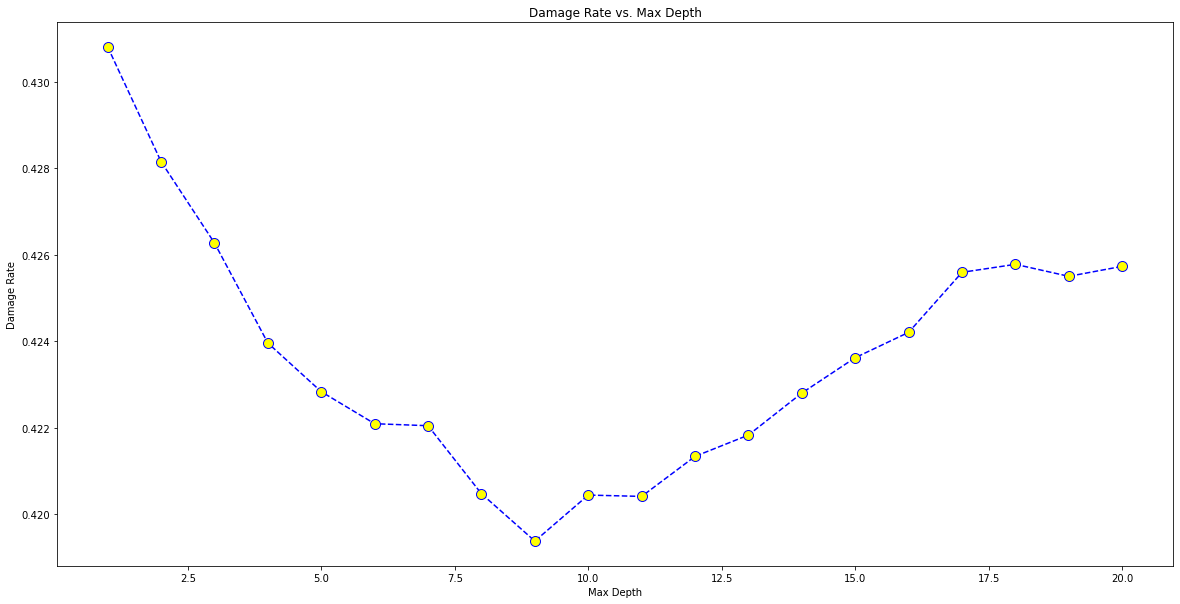

In [133]:
plt.figure(figsize=(20,10))
plt.plot(range(1,21),damage_rate_dectree,color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Damage Rate vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Damage Rate')

In [134]:
M = min(damage_rate_dectree)
search_space_depth = []

for i in range(20):
    if damage_rate_dectree[i] == M:
        search_space_depth.append(i+1)
    else:
        continue

### We will be finding the optimal values of the parameters through the method of GridSearch Cross Validation as well

In [135]:
from sklearn.model_selection import GridSearchCV
dectree2 = DecisionTreeClassifier()
param_grid = {'max_depth': search_space_depth}
dectree_rscv = GridSearchCV(dectree2, param_grid, cv=5,verbose=1,n_jobs=-1)
dectree_rscv.fit(X, y.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [9]}, verbose=1)

In [136]:
depth = dectree_rscv.best_params_['max_depth']
print('Optimal Depth:', depth)

Optimal Depth: 9


In [137]:
#pip install graphviz

In [138]:
dectree = DecisionTreeClassifier(max_depth=depth)
dectree.fit(X_train,y_train)

# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

#import graphviz
#graphviz.Source(treedot)

### Generating confusion matrix using decision tree model

Train Dataset: Decision Tree Classification
Classification Accuracy on train set: 0.5848


Text(0.5, 15.0, 'Predicted')

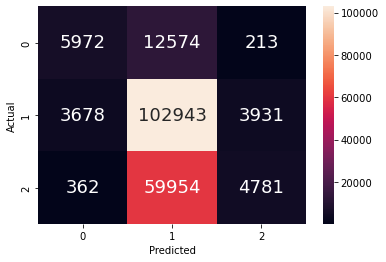

In [139]:
#Prediction on the train dataset
y_train_pred = dectree.predict(X_train)

print("Train Dataset: Decision Tree Classification")
print("Classification Accuracy on train set:", dectree.score(X_train, y_train).round(4))

cm = confusion_matrix(y_train, y_train_pred)

sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})


plt.ylabel('Actual')
plt.xlabel('Predicted')

Train Dataset: Decision Tree Classification
Classification Accuracy test set: 0.5806


Text(0.5, 15.0, 'Predicted')

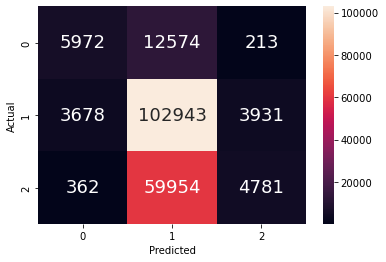

In [140]:
#Prediction on the test dataset
y_test_pred = dectree.predict(X_test)

print("Test Dataset: Decision Tree Classification")
print("Classification Accuracy test set:", dectree.score(X_test, y_test).round(4))

cm = confusion_matrix(y_train, y_train_pred)

sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})


plt.ylabel('Actual')
plt.xlabel('Predicted')


### Classification report of Decision Tree

In [141]:
from sklearn.metrics import classification_report
print('Train Data Classification Report')
print(classification_report(y_train, y_train_pred))

Train Data Classification Report
              precision    recall  f1-score   support

           1       0.60      0.32      0.42     18759
           2       0.59      0.93      0.72    110552
           3       0.54      0.07      0.13     65097

    accuracy                           0.58    194408
   macro avg       0.57      0.44      0.42    194408
weighted avg       0.57      0.58      0.49    194408



In [142]:
print('Test Data Classification Report')
print(classification_report(y_test, y_test_pred))

Test Data Classification Report
              precision    recall  f1-score   support

           1       0.56      0.30      0.39      6186
           2       0.58      0.93      0.72     36885
           3       0.52      0.07      0.13     21732

    accuracy                           0.58     64803
   macro avg       0.56      0.43      0.41     64803
weighted avg       0.56      0.58      0.49     64803



### Feature importance for the decision tree model

In [143]:
importance = dectree.feature_importances_

x = ['age',
     'count_floors_pre_eq',  
     'height_percentage',                             
     'foundation_type_fact',                         
     'roof_type_fact', 
     'ground_floor_type_fact',
     'land_surface_condition_fact']

print('Decision Tree Feature Importances')
for i in range(7):
    print(x[i],':',importance[i].round(4))

Decision Tree Feature Importances
age : 0.108
count_floors_pre_eq : 0.1248
height_percentage : 0.0519
foundation_type_fact : 0.4939
roof_type_fact : 0.1121
ground_floor_type_fact : 0.0904
land_surface_condition_fact : 0.0188


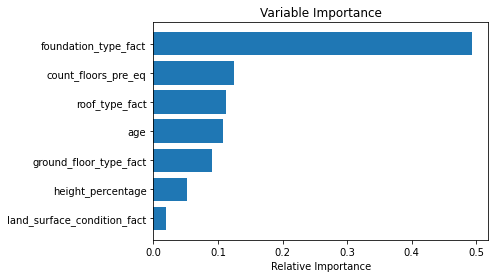

In [144]:
sorted_index = np.argsort(importance)
position = np.arange(sorted_index.shape[0]) + .5

plt.barh(position, importance[sorted_index], align='center')
plt.yticks(position, X_train.keys()[sorted_index])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Using K-Nearest Neighbours Classifier for predicting the damage grade

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [146]:
### Determining the optimium value of k and leaf size for the classification model by calculating the error rate for different values of k and leaf size

In [147]:
error_rate_knn = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    List = y_test['damage_grade'].tolist()
    error_rate_knn.append(np.mean(pred_i != List))

Text(0, 0.5, 'Error Rate')

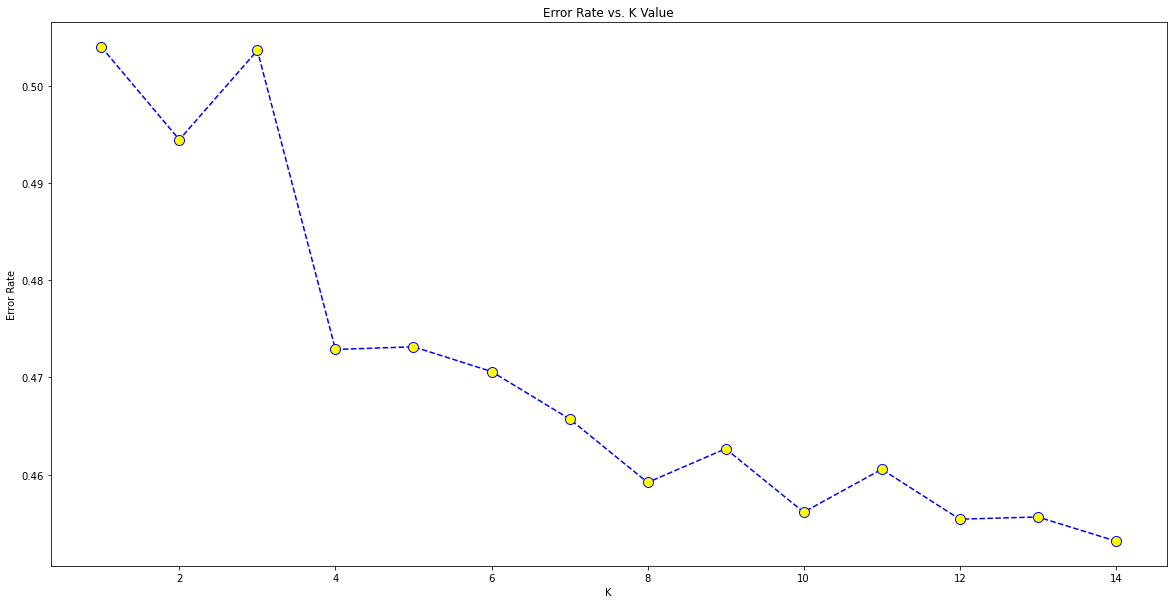

In [148]:
plt.figure(figsize=(20,10))
plt.plot(range(1,15),error_rate_knn,color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [149]:
error_rate_knn_leaf = []

for i in range(1,15):
    knn = KNeighborsClassifier(leaf_size=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    List = y_test['damage_grade'].tolist()
    error_rate_knn_leaf.append(np.mean(pred_i != List))

Text(0, 0.5, 'Error Rate')

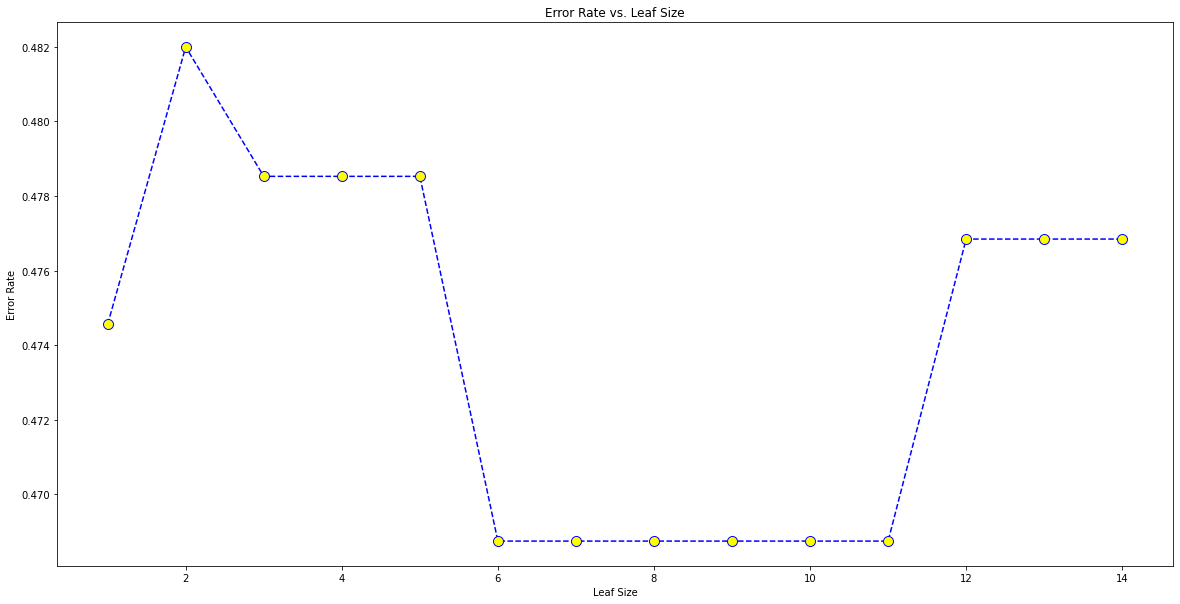

In [150]:
plt.figure(figsize=(20,10))
plt.plot(range(1,15),error_rate_knn_leaf,color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. Leaf Size')
plt.xlabel('Leaf Size')
plt.ylabel('Error Rate')

#### We store the these optimal value (no. of K and Leaf Size) into search space, then we proceed to do hyperparameters tuning using GridSearch then evaluate each combination's performance metrics using Cross Validation to get the best possible values of all parameters

In [151]:
#Finding the value of k with the minimum error rate
A = min(error_rate_knn)
search_space_k = []

for i in range(14):
    if error_rate_knn[i] == A:
        search_space_k.append(i+1)
    else:
        continue

In [152]:
#Finding the value of leaf size with the minimum error rate
B = min(error_rate_knn_leaf)
search_space_leaf = []

for i in range(14):
    if error_rate_knn_leaf[i] == B:
        search_space_leaf.append(i+1)
    else:
        continue

In [153]:
knn2 = KNeighborsClassifier(metric='euclidean')
param_grid = {'n_neighbors': search_space_k, 'leaf_size': search_space_leaf, 'weights': ['uniform','distance'], 'p': [1,2]}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, verbose=1, n_jobs=-1)
knn_gscv.fit(X, y.values.ravel())

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             n_jobs=-1,
             param_grid={'leaf_size': [6, 7, 8, 9, 10, 11], 'n_neighbors': [14],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=1)

In [154]:
k = knn_gscv.best_params_['n_neighbors']
leaf = knn_gscv.best_params_['leaf_size']
p = knn_gscv.best_params_['p']
weight = knn_gscv.best_params_['weights']

print('Optimal value of nearest neighbors:',k)
print('Optimal value of leaf size:',leaf)
print('Optimal weights:', weight)
if p==1:
    print('Optimal Distance Metric: Manhattan')
else: 
    print('Optimal Distance Metric: Euclidean')

Optimal value of nearest neighbors: 14
Optimal value of leaf size: 7
Optimal weights: uniform
Optimal Distance Metric: Manhattan


In [155]:
KNN = KNeighborsClassifier(n_neighbors=k, leaf_size=leaf, weights=weight, p=p)
KNN.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(leaf_size=7, n_neighbors=14, p=1)

### Generating confusion matrix using K Nearest Neighbors model

Train Dataset: K Nearest Neighbors Classification
Classification Accuracy: 0.5587


Text(0.5, 15.0, 'Predicted')

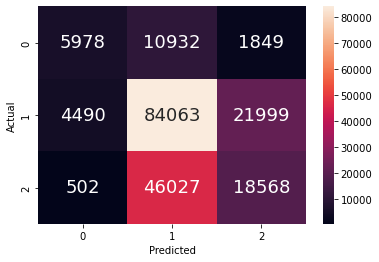

In [156]:
#Prediction on the train dataset
knn_train_pred= KNN.predict(X_train)

print("Train Dataset: K Nearest Neighbors Classification")
print("Classification Accuracy:", KNN.score(X_train, y_train).round(4))

sb.heatmap(confusion_matrix(y_train, knn_train_pred),annot = True, fmt=".0f", annot_kws={"size": 18})

plt.ylabel('Actual')
plt.xlabel('Predicted')

Test Dataset: K Nearest Neighbors Classification
Classification Accuracy: 0.5469


Text(0.5, 15.0, 'Predicted')

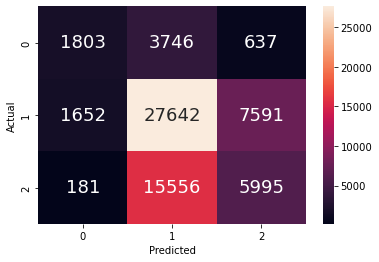

In [157]:
#Prediction on the test dataset
knn_test_pred= KNN.predict(X_test)

print("Test Dataset: K Nearest Neighbors Classification")
print("Classification Accuracy:", KNN.score(X_test, y_test).round(4))

sb.heatmap(confusion_matrix(y_test, knn_test_pred),annot = True, fmt=".0f", annot_kws={"size": 18})

plt.ylabel('Actual')
plt.xlabel('Predicted')

### Classification report of KNN

In [158]:
from sklearn.metrics import classification_report
print('Train Dataset Classification Report')
print(classification_report(y_train, knn_train_pred))

Train Dataset Classification Report
              precision    recall  f1-score   support

           1       0.54      0.32      0.40     18759
           2       0.60      0.76      0.67    110552
           3       0.44      0.29      0.35     65097

    accuracy                           0.56    194408
   macro avg       0.53      0.45      0.47    194408
weighted avg       0.54      0.56      0.53    194408



In [159]:
print('Test Dataset Classification Report')
print(classification_report(y_test, knn_test_pred))

Test Dataset Classification Report
              precision    recall  f1-score   support

           1       0.50      0.29      0.37      6186
           2       0.59      0.75      0.66     36885
           3       0.42      0.28      0.33     21732

    accuracy                           0.55     64803
   macro avg       0.50      0.44      0.45     64803
weighted avg       0.52      0.55      0.52     64803



### Feature Importance in KNN model using Cross Validation

In [160]:
from sklearn.model_selection import cross_val_score

n_feats = X.shape[1]
score = []
features = ['age',
                             'count_floors_pre_eq',
                             'height_percentage',
                             'foundation_type_fact',
                             'roof_type_fact',
                             'ground_floor_type_fact',
                             'land_surface_condition_fact']

print('K Nearest Neighbors Feature Importances')
for i in range(n_feats):
    x =  X.values[:, i].reshape(-1, 1)
    scores = cross_val_score(KNN, x, y.values.ravel(), cv=3)
    print(features[i],':',scores.mean().round(4))
    score.append(scores.mean().round(4))

K Nearest Neighbors Feature Importances
age : 0.5175
count_floors_pre_eq : 0.4976
height_percentage : 0.5566
foundation_type_fact : 0.4393
roof_type_fact : 0.402
ground_floor_type_fact : 0.4017
land_surface_condition_fact : 0.443


<AxesSubplot:ylabel='Features'>

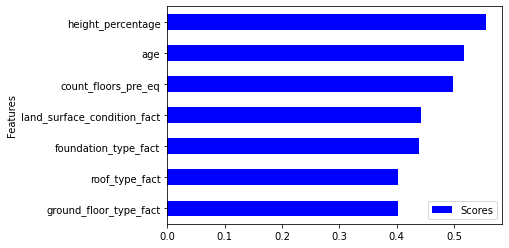

In [161]:
cross_val_data = {'Features': ['age',
                             'count_floors_pre_eq',
                             'height_percentage',
                             'foundation_type_fact',
                             'roof_type_fact',
                             'ground_floor_type_fact',
                             'land_surface_condition_fact'], 'Scores': score}
feature_data = pd.DataFrame(cross_val_data)
feat = feature_data.sort_values('Scores')

feat.plot(kind='barh',y='Scores',x='Features',color='b')

# Importing Random Forest and using it to predict damage grade

In [162]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 22)
# Train the model on training data  
rf_model = rf.fit(X_train, y_train)

importance = rf_model.feature_importances_

# Use the forest's predict method on the test data
rf_test = rf_model.predict(X_test)

### Generating Confusion Matrix Using Random Forest Model

In [163]:
y_pred = pd.DataFrame(rf_test)

# Damage Grade 1
y_test_1 = y_test.copy() 
y_test_1 = y_test_1.applymap(lambda x: 1 if x == 1 else 0)
y_pred_1 = y_pred.copy()
y_pred_1 = y_pred_1.applymap(lambda x: 1 if x == 1 else 0)

# Damage Grade 2
y_test_2 = y_test.copy() 
y_test_2 = y_test_2.applymap(lambda x: 1 if x == 2 else 0)
y_pred_2 = y_pred.copy()
y_pred_2 = y_pred_2.applymap(lambda x: 1 if x == 2 else 0)

# Damage Grade 3
y_test_3 = y_test.copy() 
y_test_3 = y_test_3.applymap(lambda x: 1 if x == 3 else 0)
y_pred_3 = y_pred.copy()
y_pred_3 = y_pred_3.applymap(lambda x: 1 if x == 3 else 0)

True Positive Rate: 0.5394
False Positive Rate: 0.4606
True Negative Rate: 0.9298
False Negative Rate: 0.0702


Text(0.5, 15.0, 'Predicted')

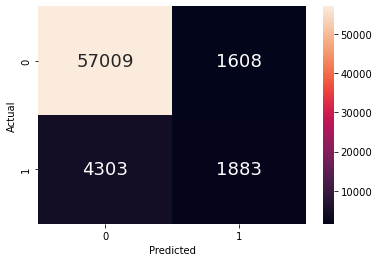

In [164]:
# Damage Grade 1
sb.heatmap(confusion_matrix(y_test_1, y_pred_1),
           annot = True, fmt=".0f", annot_kws={"size": 18})

tn, fp, fn, tp = confusion_matrix(y_test_1, y_pred_1).ravel()

print("True Positive Rate:", (tp/(tp+fp)).round(4))
print("False Positive Rate:", (fp/(tp+fp)).round(4))
print("True Negative Rate:", (tn/(tn+fn)).round(4))
print("False Negative Rate:", (fn/(tn+fn)).round(4))

plt.ylabel('Actual')
plt.xlabel('Predicted')

True Positive Rate: 0.5918
False Positive Rate: 0.4082
True Negative Rate: 0.5335
False Negative Rate: 0.4665


Text(0.5, 15.0, 'Predicted')

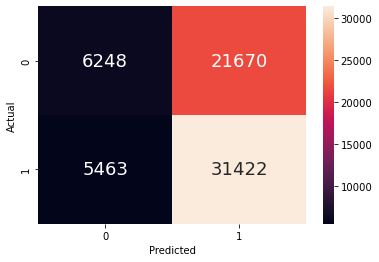

In [165]:
# Damage Grade 2
sb.heatmap(confusion_matrix(y_test_2, y_pred_2),
           annot = True, fmt=".0f", annot_kws={"size": 18})

tn, fp, fn, tp = confusion_matrix(y_test_2, y_pred_2).ravel()

print("True Positive Rate:", (tp/(tp+fp)).round(4))
print("False Positive Rate:", (fp/(tp+fp)).round(4))
print("True Negative Rate:", (tn/(tn+fn)).round(4))
print("False Negative Rate:", (fn/(tn+fn)).round(4))

plt.ylabel('Actual')
plt.xlabel('Predicted')

True Positive Rate: 0.4864
False Positive Rate: 0.5136
True Negative Rate: 0.6866
False Negative Rate: 0.3134


Text(0.5, 15.0, 'Predicted')

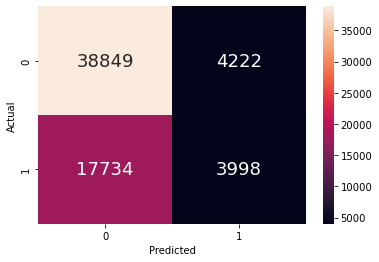

In [166]:
# Damage Grade 3
sb.heatmap(confusion_matrix(y_test_3, y_pred_3),
           annot = True, fmt=".0f", annot_kws={"size": 18})

tn, fp, fn, tp = confusion_matrix(y_test_3, y_pred_3).ravel()

print("True Positive Rate:", (tp/(tp+fp)).round(4))
print("False Positive Rate:", (fp/(tp+fp)).round(4))
print("True Negative Rate:", (tn/(tn+fn)).round(4))
print("False Negative Rate:", (fn/(tn+fn)).round(4))

plt.ylabel('Actual')
plt.xlabel('Predicted')

### Classification Report of Random Forest Model on Test Data

In [170]:
print('Test Dataset Classification Report')
print("Classification Accuracy:", rf.score(X_test, y_test).round(4))
print(classification_report(y_test, rf_test))

Test Dataset Classification Report
Classification Accuracy: 0.5756
              precision    recall  f1-score   support

           1       0.54      0.30      0.39      6186
           2       0.59      0.85      0.70     36885
           3       0.49      0.18      0.27     21732

    accuracy                           0.58     64803
   macro avg       0.54      0.45      0.45     64803
weighted avg       0.55      0.58      0.52     64803



### Feature Importance in Random Forest Model

In [168]:
print('Random Forest Features Importances')
print("age:" ,importance[0].round(4))
print("count_floors_pre_eq:" ,importance[1].round(4))
print("height_percentage:" ,importance[2].round(4))
print("foundation_type_fact:" ,importance[3].round(4))
print("ground_floor_type_fact:" ,importance[4].round(4))
print("land_surface_condition_fact:" ,importance[4].round(4))

Random Forest Features Importances
age: 0.2618
count_floors_pre_eq: 0.0921
height_percentage: 0.1586
foundation_type_fact: 0.1823
ground_floor_type_fact: 0.1056
land_surface_condition_fact: 0.1056


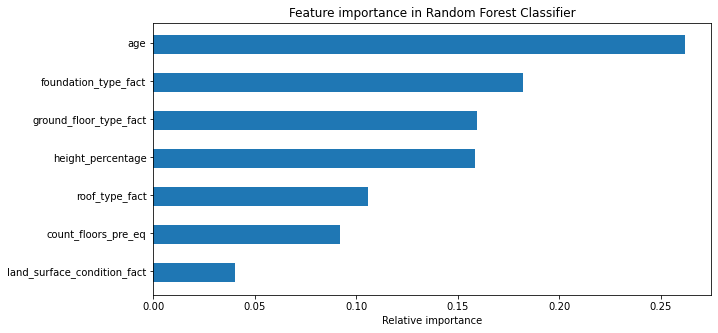

<Figure size 360x360 with 0 Axes>

In [169]:
column = ['age',
     'count_floors_pre_eq',  
     'height_percentage',                             
     'foundation_type_fact',                         
     'roof_type_fact', 
     'ground_floor_type_fact',
     'land_surface_condition_fact']
sort_idx = np.argsort(importance)
sorted_column = []
for i in range(7):
    sorted_column.append(column[sort_idx[i]])    
ind = np.arange(sort_idx.shape[0]) + .5
# Plot the graph of feature of importance
fig, ax = plt.subplots() 
width = 0.5  
ax.barh(ind, importance[sort_idx], width)
ax.set_yticks(ind+width/10)
ax.set_yticklabels(sorted_column, minor=False)
plt.title('Feature importance in Random Forest Classifier')
plt.xlabel('Relative importance')
plt.figure(figsize=(5,5))
fig.set_size_inches(10, 5, forward=True)

#### Based on our model we can see that age is a very important parameter to predict a damage grade of a given building